1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is this number signficantly different?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 3 or larger with respect a normal distribution.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

Which is a big percentage:  138.0952380952381
p value is much bigger than significance level. pvalue is:  0.9995165758576161
For 15 or more hurricanes k is arranged to 14, and the p15 is:  0.002217122790073134


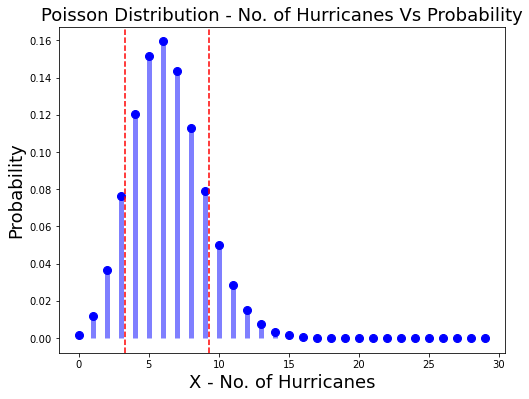

In [120]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import poisson
import math
#The difference is even bigger than 10%. So, it is significantly different. It can not be thought as random noise.
#Before starting it is important to state that the Poisson is approximately normally distributed.
#Therefore, it is proper for Z test for large samples.

mu = 6.3
ChangePercentage = ((15-mu)/mu)*100
print("Which is a big percentage: ",ChangePercentage)
X = np.arange(0,30)

poisson_pd = poisson.pmf(X, mu)
#
# Plot the probability distribution
#
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot(X, poisson_pd, 'bo', ms=8, label='poisson pmf')
plt.ylabel("Probability", fontsize="18")
plt.xlabel("X - No. of Hurricanes", fontsize="18")
plt.title("Poisson Distribution - No. of Hurricanes Vs Probability", fontsize="18")
ax.vlines(X, 0, poisson_pd, colors='b', lw=5, alpha=0.5)
#For two tailed p value Z = 3.3 and Z = 9.3 simmetric to "mu" considering Z=3 for normal distribution.
pvalue = stats.norm.cdf(3.3)+1-stats.norm.cdf(9.3)
plt.axvline(mu-3, linestyle='--', color='red')
plt.axvline(mu+3, linestyle='--', color='red')
print("p value is much bigger than significance level. pvalue is: ",pvalue)
# For the 15 or more hurricanes probability
p15 = 1 - poisson.cdf(k=14,mu=6.3)
print("For 15 or more hurricanes k is arranged to 14, and the p15 is: ",p15)



2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

T:  -3.786997938137629


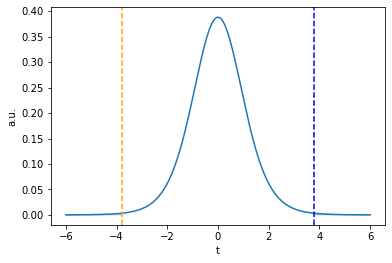

p-value = 0.004302464132864604
p-value < 0.025 ---> We accept the null hypothesis that halogen lightning exposure increases the blood pressure.
The change on the blood pressures is statistically significant.


In [132]:
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])

sigma1 = sqrt(np.var(pre,ddof=1))
#print(sigma1)
sigma2 = sqrt(np.var(post,ddof=1))
#print(sigma2)
sigma = sqrt((sigma1**2 + sigma2**2)/2.0)
#print(sigma)

n=len(pre)
T = (np.mean(pre)-np.mean(post))/(sigma*sqrt(2.0/n))
print("T: ",T)

# plot the test statistics and its pdf
xs = np.linspace(-6, +6, 1000)
ts = stats.t.pdf(xs, n - 1)
plt.plot(xs, ts)
plt.fill_between(xs, ts, where=np.abs(xs) > np.abs(T), color='lightblue')
plt.axvline(T, linestyle='--', color='orange')
plt.axvline(-T, linestyle='--', color='blue')
plt.ylabel("a.u.")
plt.xlabel("t")
plt.show()

# now we calculate the p-value. Since it's double sided:
pvalue = stats.t.cdf(T, n - 1) + (1. - stats.t.cdf(-T, n - 1))
print("p-value =", pvalue)

if pvalue<0.025: # alpha/2 because 2-sided pvalue
    print("p-value < 0.025 ---> We accept the null hypothesis that halogen lightning exposure"  
" increases the blood pressure.\nThe change on the blood pressures is statistically significant.")
else:
    print("Change is not statistically significant. We reject the hypothesis.")


3\. **FFT of a simple dataset**

Perform a periodicity analysis on the lynxs-hares population, i.e. determine what is the period of the population of these animals.

Peak frequency: 0.09523809523809523
Peak frequency: 0.09523809523809523


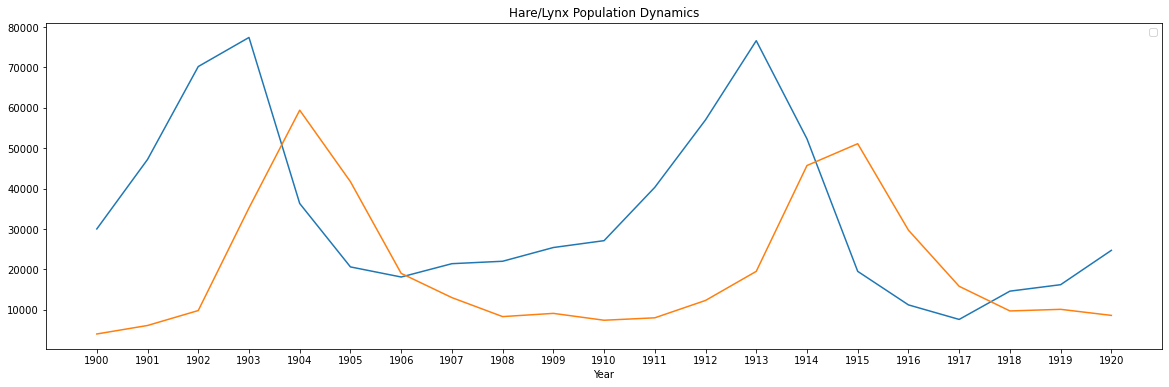

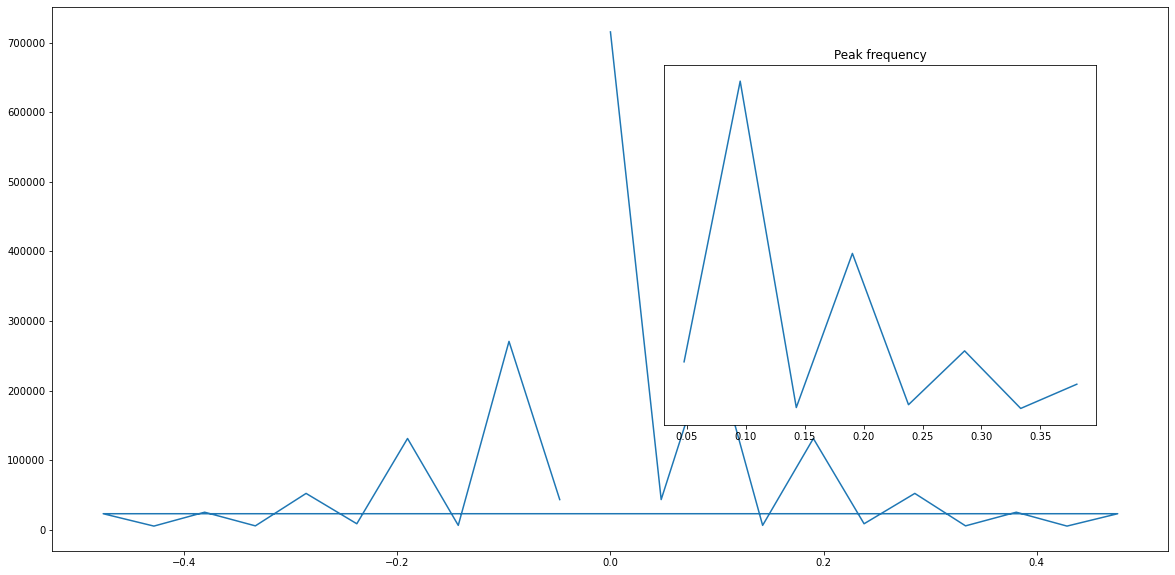

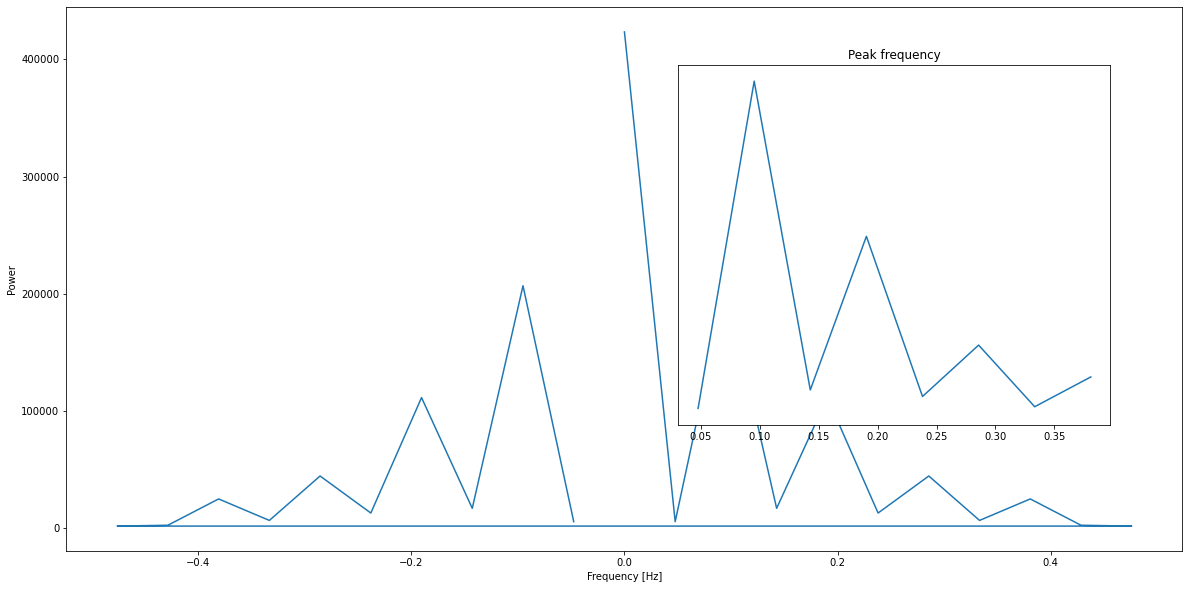

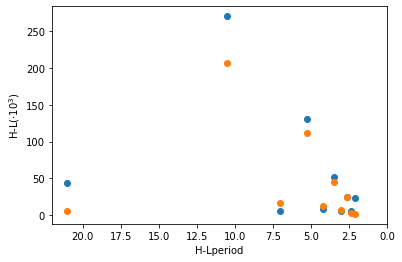

In [204]:
from scipy import fftpack

df = np.loadtxt("data/populations.txt")
#print(df.T[3])

t = df.T[0]
H = df.T[1]
L = df.T[2]

plt.figure(figsize=(20, 6))
x_ticks = t
plt.xticks(ticks=x_ticks)
plt.title('Hare/Lynx Population Dynamics')
plt.xlabel('Year')
plt.legend(['Hare','Lynx'])
plt.plot(x_ticks,H)
plt.plot(x_ticks,L)





# ----------------------------------------------------------
# Periodicity Analysis
# The FFT of the signal
time_step = t[1]-t[0]
H_fft = fftpack.fft(H)
L_fft = fftpack.fft(L)
# And the power (sig_fft is of complex dtype)
H_power = np.abs(H_fft) 
L_power = np.abs(L_fft)
# The return the corresponding frequencies
Hsample_freq = fftpack.fftfreq(H.size, d=time_step)
#print(Hsample_freq)

Lsample_freq = fftpack.fftfreq(L.size, d=time_step)

# Plot the FFT power
plt.figure(figsize=(20, 10))
plt.plot(Hsample_freq, H_power)
Hpos_mask = np.where(Hsample_freq > 0)
Hfreqs = Hsample_freq[Hpos_mask]
Hpowes = H_power[Hpos_mask]
Hpeak_freq = Hfreqs[Hpowes.argmax()]
axes = plt.axes([0.55, 0.3, 0.3, 0.5])
plt.title('Peak frequency')
plt.plot(Hfreqs[:8], Hpowes[:8])
plt.setp(axes, yticks=[])




plt.figure(figsize=(20, 10))
plt.plot(Lsample_freq, L_power)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power')


# Find the peak frequency: focus only on only the positive frequencies

Lpos_mask = np.where(Lsample_freq > 0)

Lfreqs = Lsample_freq[Lpos_mask]
Lpowes = L_power[Lpos_mask]
# find the max of freqs array

Lpeak_freq = Lfreqs[Lpowes.argmax()]

axes = plt.axes([0.55, 0.3, 0.3, 0.5])
plt.title('Peak frequency')
plt.plot(Lfreqs[:8], Lpowes[:8])
plt.setp(axes, yticks=[])
print("Peak frequency:", Hpeak_freq)
print("Peak frequency:", Lpeak_freq)
# Check that it does indeed correspond to the frequency that we generate the signal with
#print("Does the peak correspond to the initial frequency?", np.allclose(peak_freq, ang_freq))

# An inner plot to show the peak frequency

#print(Hpowes)
Hperiod = 1/Hfreqs
#print(Hperiod)
Lperiod = 1/Lfreqs
plt.figure()
plt.plot(Hperiod, Hpowes * 1e-3, 'o')
plt.plot(Lperiod, Lpowes * 1e-3, 'o')
plt.xlim(22,0)
plt.xlabel('H-Lperiod')
plt.ylabel('H-L($\cdot10^3$)')
plt.show()


4\. **FFT of an image**

Write a filter that removes the periodic noise from the `moonlanding.png` image by using a 2-dimensional FFT.

* Import the image as a 2D numpy array using `plt.imread("moonlanding.png")`. Examine the image with `plt.imshow()`, which is heavily contaminated with periodic noise.
* Check the documentation of the `scipy.fftpack` package, and find the method that performs a 2D FFT. Plot the spectrum (Fourier transform of) the image. **Hint**: use `LogNorm` to plot the colors in log scale:
```Python
from matplotlib.colors import LogNorm
plt.imshow(image, norm=LogNorm(vmin=5))
```
* Inspect the spectrum, and try to locate the regions of the power spectrum that contain the signal and those which contain the periodic noise. Use array slicing to set the noise regions to zero.
* Apply the inverse Fourier transform to plot the resulting image.

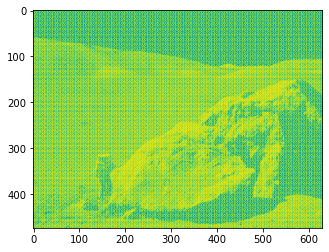

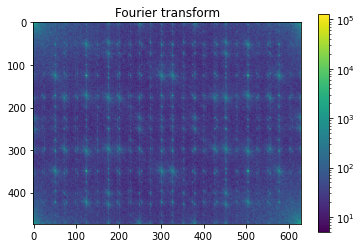

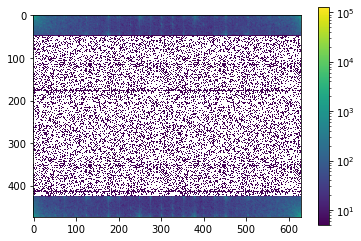

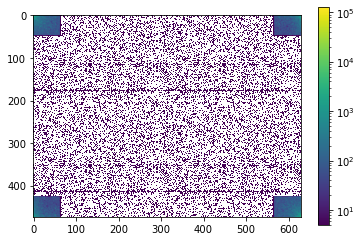

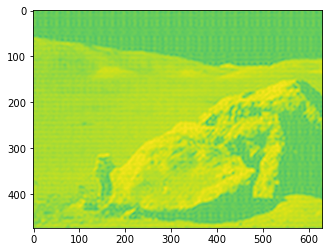

In [308]:
from matplotlib.colors import LogNorm
from scipy.fftpack import fft2, ifft2
image = plt.imread("data/moonlanding.png").astype(float)



my2DFTT = fft2(image)
plt.imshow(image, norm=LogNorm(vmin=0.01))


AbsFTT = np.abs(my2DFTT)
plt.figure()
plt.imshow(np.abs(AbsFTT), norm=LogNorm(vmin=5))
plt.colorbar()
plt.title('Fourier transform')

my2DFTT_Copied = my2DFTT.copy()

r, c = my2DFTT_Copied.shape

# Set to zero all rows with indices between r*keep_fraction and
# r*(1-keep_fraction):

my2DFTT_Copied[int(r*0.1):int(r*(0.9))] = 0
plt.figure()
plt.imshow(np.abs(my2DFTT_Copied), norm=LogNorm(vmin=5))
plt.colorbar()
my2DFTT_Copied[:, int(c*0.1):int(c*(0.9))] = 0
#print(my2DFTT_Copied[1])
plt.figure()
plt.imshow(np.abs(my2DFTT_Copied), norm=LogNorm(vmin=5))
plt.colorbar()

plt.figure()
filtered_image = fftpack.ifft2(my2DFTT_Copied).real
plt.imshow(filtered_image, norm=LogNorm(vmin=0.01))